# Arindam_DTU_1

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly           #(version 4.5.0)
import plotly.express as px
import plotly.io as pio
import seaborn as sns
%matplotlib inline

##  Data

In [3]:
data=pd.read_csv("transaction_data.csv")

In [4]:
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


### DataSet
**The dataset contains transactions on an e-commerce website between the period Feb 2018 to Feb 2019 from customers across different countries.**

File: transaction_data.csv</br>
Columns</br>

UserId 				- Unique identifier of a user.

TransactionId 			- Unique identifier of a transaction. If the same TransactionId is present in multiple rows, then all those products are bought together in the same transaction.

TransactionTime		- Time at which the transaction is performed

ItemCode			- Unique identifier of the product purchased

ItemDescription		- Simple description of the product purchased

NumberOfItemsPurchased	- Quantity of the product purchased in the transaction

CostPerItem			- Price per each unit of the product

Country			- Country from which the purchase is made.


In [5]:
data.shape

(1083818, 8)

In [6]:
columns = list(data.columns)
columns

['UserId',
 'TransactionId',
 'TransactionTime',
 'ItemCode',
 'ItemDescription',
 'NumberOfItemsPurchased',
 'CostPerItem',
 'Country']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [8]:
# categorical and numerical column names 
cats = list(data.select_dtypes(include=['object']).columns)
nums = list(data.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {cats}')
print()
print(f'numerical variables:  {nums}')

categorical variables:  ['TransactionTime', 'ItemDescription', 'Country']

numerical variables:  ['UserId', 'TransactionId', 'ItemCode', 'NumberOfItemsPurchased', 'CostPerItem']


In [9]:
data.nunique(axis=0)

UserId                     4373
TransactionId             25900
TransactionTime           23260
ItemCode                   3407
ItemDescription            4223
NumberOfItemsPurchased      722
CostPerItem                1631
Country                      38
dtype: int64

## Exploratory Data Analysis (EDA)

##### First we will check for Missing Data

In [10]:
data.isna().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

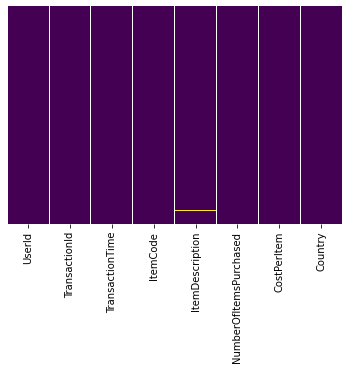

In [11]:
# simple heatmap to see where we are missing data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
# let's print these 2908 `nan` containing rows 
data[data.isnull().any(axis=1)]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
322,-1,6314803,Mon Jan 14 11:15:00 IST 2019,495159,NaN,9,0.0,United Kingdom
762,-1,6206420,Mon Nov 05 05:34:00 IST 2018,434364,NaN,3,0.0,United Kingdom
1080,-1,6297863,Sat Jan 05 12:06:00 IST 2019,1782417,NaN,-3,0.0,United Kingdom
2204,-1,6142961,Mon Sep 10 09:41:00 IST 2018,458157,NaN,-240,0.0,United Kingdom
2210,-1,6176445,Mon Oct 08 10:06:00 IST 2018,1666056,NaN,108,0.0,United Kingdom
...,...,...,...,...,...,...,...,...
1080070,-1,6074486,Wed Jul 18 11:26:00 IST 2018,462735,NaN,-480,0.0,United Kingdom
1080468,-1,6178260,Tue Oct 09 12:18:00 IST 2018,472542,NaN,3,0.0,United Kingdom
1080485,-1,6237649,Wed Nov 28 07:41:00 IST 2018,471492,NaN,-189,0.0,United Kingdom
1080983,-1,6128529,Wed Aug 29 05:34:00 IST 2018,755265,NaN,6,0.0,United Kingdom


In [13]:
2906 / len(data)

0.0026812619831004837

Roughly 0.27% (2908 out of 1083818) of the ItemDescription data is missing. As this fraction is very low so it's safe to drop these nan rows for now

## Data Cleaning

In [14]:
# for now remove all nan rows as they are just 0.27%
data = data[~data.isnull().any(axis=1)]
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)
data.shape

(1080910, 8)

In [15]:
print(f'total duplicate rows: {data.duplicated().sum()}')

# drop duplicate rows if any
data = data[~data.duplicated()]
data.shape

total duplicate rows: 545792


(535118, 8)

In [16]:
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1077824    False
1078317    False
1078364    False
1078469    False
1078594    False
Length: 535118, dtype: bool

In [17]:
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [18]:
# group all variables together having same type
data = pd.concat((data[cats], data[nums]), axis=1)
data.head()

,TransactionTime,ItemDescription,Country,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
0,Sat Feb 02 12:50:00 IST 2019,FAMILY ALBUM WHITE PICTURE FRAME,United Kingdom,278166,6355745,465549,6,11.73
1,Wed Dec 26 09:06:00 IST 2018,LONDON BUS COFFEE MUG,United Kingdom,337701,6283376,482370,3,3.52
2,Fri Feb 15 09:45:00 IST 2019,SET 12 COLOUR PENCILS DOLLY GIRL,France,267099,6385599,490728,72,0.90
3,Fri Jun 22 07:14:00 IST 2018,UNION JACK FLAG LUGGAGE TAG,United Kingdom,380478,6044973,459186,3,1.73
4,Mon Sep 10 11:58:00 IST 2018,WASHROOM METAL SIGN,United Kingdom,-1,6143225,1733592,3,3.40


In [19]:
num_rows, num_cols = data.shape

###### saving cleaned data
data.to_csv('data_cleaned.csv', index=False)

## Analysis on Categorical Attributes

In [20]:
df = pd.read_csv("data_cleaned.csv")

In [21]:
print(f'categorical variables:  {cats}')

categorical variables:  ['TransactionTime', 'ItemDescription', 'Country']


In [22]:
df_cat = df.loc[:, 'TransactionTime':'Country']
df_cat.head()

,TransactionTime,ItemDescription,Country
0,Sat Feb 02 12:50:00 IST 2019,FAMILY ALBUM WHITE PICTURE FRAME,United Kingdom
1,Wed Dec 26 09:06:00 IST 2018,LONDON BUS COFFEE MUG,United Kingdom
2,Fri Feb 15 09:45:00 IST 2019,SET 12 COLOUR PENCILS DOLLY GIRL,France
3,Fri Jun 22 07:14:00 IST 2018,UNION JACK FLAG LUGGAGE TAG,United Kingdom
4,Mon Sep 10 11:58:00 IST 2018,WASHROOM METAL SIGN,United Kingdom


In [23]:
# remove extra spaces if any
for col in ['ItemDescription', 'Country']:
    df_cat[col] = df_cat[col].apply(lambda x: ' '.join(x.split()))

In [24]:
df_cat['NumberOfItemsPurchased_level'] = df['NumberOfItemsPurchased'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
cats.append('mpg_level')
print(f'categorical variables:  {cats}')

categorical variables:  ['TransactionTime', 'ItemDescription', 'Country', 'mpg_level']


In [25]:
print(f"categories in Country: {pd.unique(df_cat['Country'])}")
print(f"categories in ItemDescription: {pd.unique(df_cat['ItemDescription'])}")

categories in Country: ['United Kingdom' 'France' 'Austria' 'Australia' 'EIRE' 'Portugal'
 'Germany' 'Sweden' 'Cyprus' 'Spain' 'Japan' 'Belgium' 'Singapore'
 'Denmark' 'Netherlands' 'Norway' 'Canada' 'Iceland' 'Switzerland'
 'Poland' 'Finland' 'Hong Kong' 'Italy' 'Malta' 'Israel' 'Channel Islands'
 'Unspecified' 'USA' 'Czech Republic' 'Lebanon' 'Brazil'
 'European Community' 'Greece' 'RSA' 'Bahrain' 'Lithuania'
 'United Arab Emirates' 'Saudi Arabia']
categories in ItemDescription: ['FAMILY ALBUM WHITE PICTURE FRAME' 'LONDON BUS COFFEE MUG'
 'SET 12 COLOUR PENCILS DOLLY GIRL' ... 'mouldy'
 '4 GOLD FLOCK CHRISTMAS BALLS' 'BAKING MOULD CUPCAKE CHOCOLATE']


## Analysis of Distribution


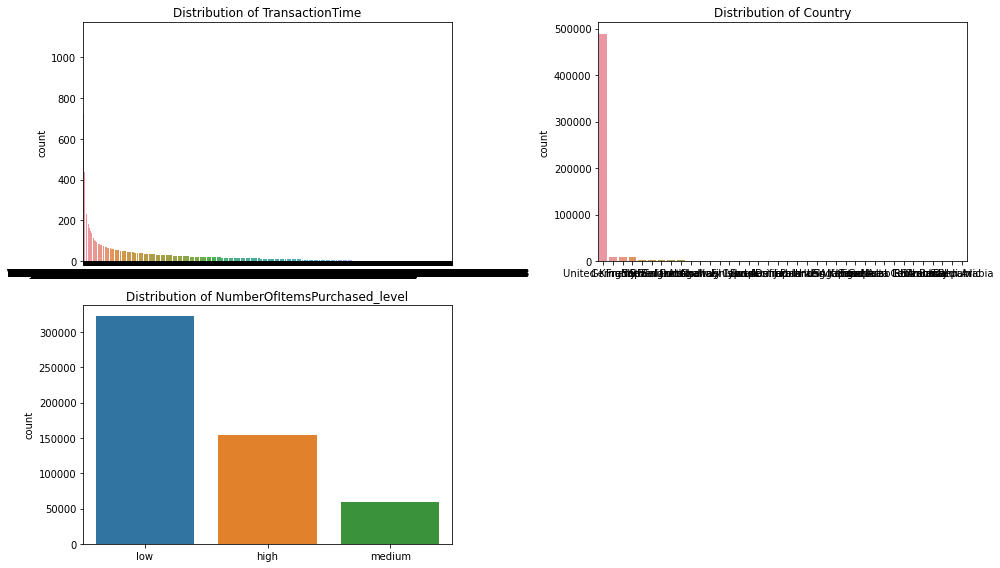

In [36]:
fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cat.drop(['ItemDescription'], axis=1).columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(df_cat[cat], order=df_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

In [26]:
df_cat.head()

,TransactionTime,ItemDescription,Country,NumberOfItemsPurchased_level
0,Sat Feb 02 12:50:00 IST 2019,FAMILY ALBUM WHITE PICTURE FRAME,United Kingdom,low
1,Wed Dec 26 09:06:00 IST 2018,LONDON BUS COFFEE MUG,United Kingdom,low
2,Fri Feb 15 09:45:00 IST 2019,SET 12 COLOUR PENCILS DOLLY GIRL,France,high
3,Fri Jun 22 07:14:00 IST 2018,UNION JACK FLAG LUGGAGE TAG,United Kingdom,low
4,Mon Sep 10 11:58:00 IST 2018,WASHROOM METAL SIGN,United Kingdom,low


## Analysis on Numerical Attributes

In [27]:
df = pd.read_csv("data_cleaned.csv")
df.head()

,TransactionTime,ItemDescription,Country,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
0,Sat Feb 02 12:50:00 IST 2019,FAMILY ALBUM WHITE PICTURE FRAME,United Kingdom,278166,6355745,465549,6,11.73
1,Wed Dec 26 09:06:00 IST 2018,LONDON BUS COFFEE MUG,United Kingdom,337701,6283376,482370,3,3.52
2,Fri Feb 15 09:45:00 IST 2019,SET 12 COLOUR PENCILS DOLLY GIRL,France,267099,6385599,490728,72,0.90
3,Fri Jun 22 07:14:00 IST 2018,UNION JACK FLAG LUGGAGE TAG,United Kingdom,380478,6044973,459186,3,1.73
4,Mon Sep 10 11:58:00 IST 2018,WASHROOM METAL SIGN,United Kingdom,-1,6143225,1733592,3,3.40


In [28]:
df_num = df.loc[:, 'UserId':]

In [29]:
df_num.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,535118.000000,5.351180e+05,5.351180e+05,535118.000000,5.351180e+05
mean,240816.018258,6.159312e+06,6.576364e+05,29.016845,9.586187e+00
std,142333.532611,1.475318e+05,4.520824e+05,657.219445,2.322739e+03
min,-1.000000,5.900015e+06,-1.000000e+00,-242985.000000,-1.526564e+04
25%,259329.000000,6.026856e+06,4.609290e+05,3.000000,1.730000e+00
50%,301560.000000,6.166490e+06,4.752930e+05,9.000000,2.880000e+00
75%,341082.000000,6.288975e+06,4.889010e+05,30.000000,5.700000e+00
max,384027.000000,6.397457e+06,1.894494e+06,242985.000000,1.696285e+06


### Analysis of Distribution

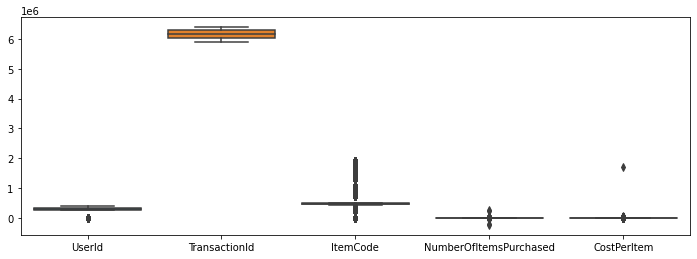

In [30]:
fig = plt.figure(1, (12, 4))
ax = plt.subplot(1,1,1)
sns.boxplot(x="variable", y="value", data=pd.melt(df_num))
plt.xlabel(None)
plt.ylabel(None)
plt.show()

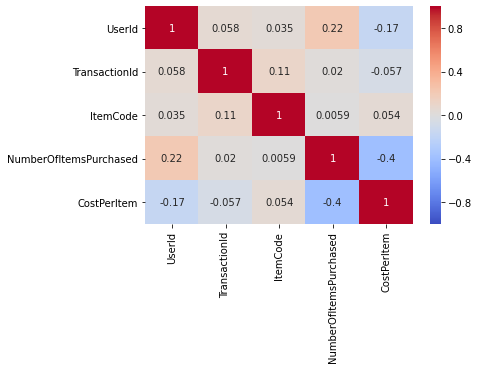

In [33]:
sns.heatmap(df_num.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()